<a href="https://colab.research.google.com/github/Varsha35-wq/SCT_ML_2/blob/main/k_means.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

In [3]:
from google.colab import files
uploaded = files.upload()

Saving Mall_Customers.csv to Mall_Customers.csv


In [4]:
import pandas as pd
df = pd.read_csv(next(iter(uploaded)))
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [5]:
features = df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].copy()

In [6]:
scaler   = StandardScaler()
X_scaled = scaler.fit_transform(features)

In [8]:
inertia    = []
silhouette = []
k_range    = range(2, 11)

for k in k_range:
    km = KMeans(n_clusters=k, random_state=42, n_init="auto").fit(X_scaled)
    inertia.append(km.inertia_)
    silhouette.append(silhouette_score(X_scaled, km.labels_))

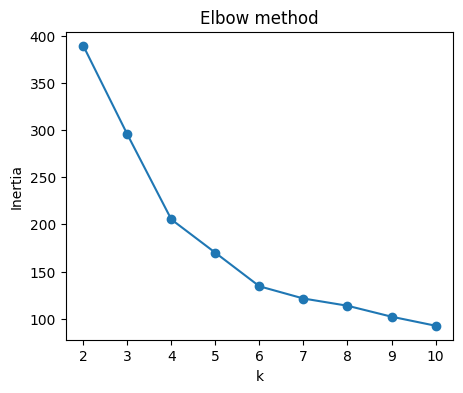

In [9]:
plt.figure(figsize=(5,4))
plt.plot(k_range, inertia, marker='o')
plt.xlabel('k'); plt.ylabel('Inertia'); plt.title('Elbow method')
plt.show()

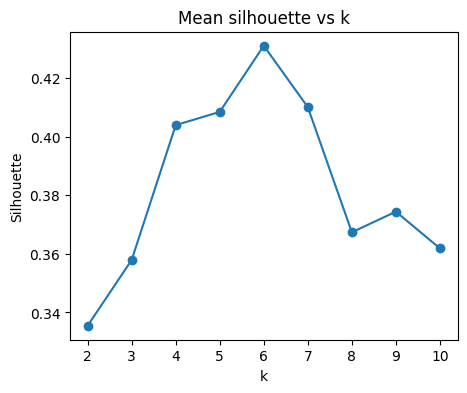

In [10]:
plt.figure(figsize=(5,4))
plt.plot(k_range, silhouette, marker='o')
plt.xlabel('k'); plt.ylabel('Silhouette'); plt.title('Mean silhouette vs k')
plt.show()

In [11]:
k_final = 5
kmeans  = KMeans(n_clusters=k_final, random_state=42, n_init="auto")
df['Cluster'] = kmeans.fit_predict(X_scaled)

In [12]:
cluster_profile = df.groupby('Cluster')[['Age',
                                         'Annual Income (k$)',
                                         'Spending Score (1-100)']].mean().round(1)

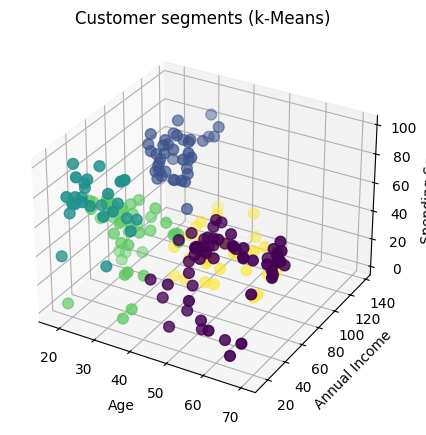

In [13]:
from mpl_toolkits.mplot3d import Axes3D      # noqa
fig = plt.figure(figsize=(6,5))
ax  = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(df['Age'],
                     df['Annual Income (k$)'],
                     df['Spending Score (1-100)'],
                     c=df['Cluster'],
                     s=60)
ax.set_xlabel('Age')
ax.set_ylabel('Annual Income')
ax.set_zlabel('Spending Score')
plt.title('Customer segments (k-Means)')
plt.show()